In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv("train (1).csv",usecols=["FireplaceQu","GarageQual","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


### 1) Most Frequent

In [179]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

- so basically we can do most frquent on GarageQual because data is missing only 5% and don't use it on FireplaceQu because it will change the distribution of data we will see how it will change the distrbution of data

Text(0.5, 1.0, 'GarageQual')

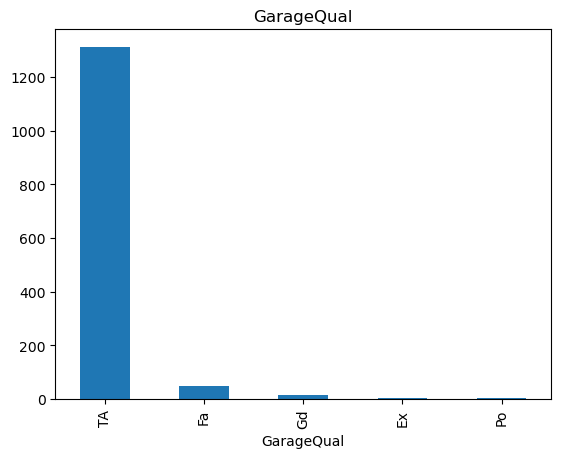

In [180]:
df["GarageQual"].value_counts().plot(kind="bar")
plt.title("GarageQual")

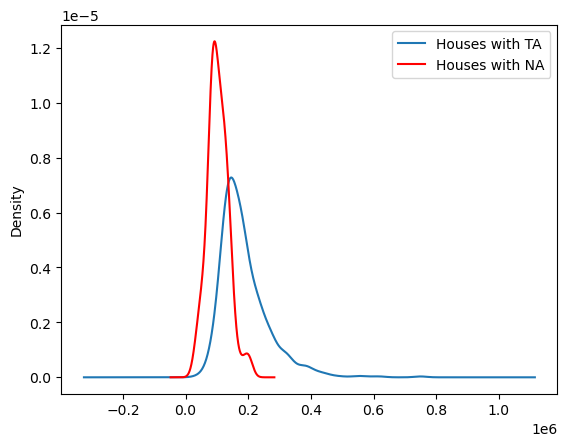

In [181]:
fig=plt.figure()
ax=fig.add_subplot(111)

# only TA
df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax)
# null values
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde",color="red",ax=ax)
line,labels=ax.get_legend_handles_labels()
labels=["Houses with TA","Houses with NA"]
ax.legend(line,labels,loc="best")


In [182]:
temp=df[df["GarageQual"]=="TA"]["SalePrice"]

In [183]:
df["GarageQual"].fillna("TA",inplace=True)

C:\Users\kaleg\AppData\Local\Temp\ipykernel_6092\1808853980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageQual"].fillna("TA",inplace=True)


<Axes: xlabel='GarageQual'>

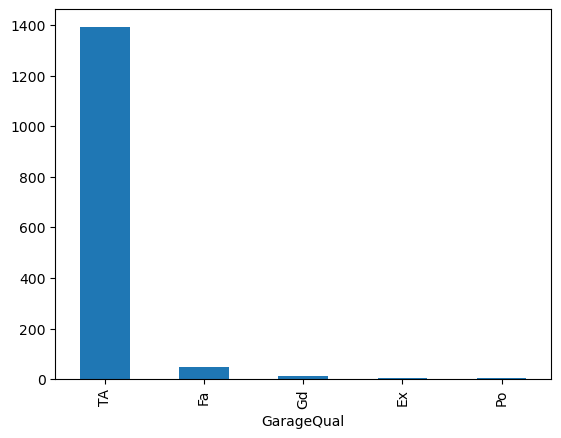

In [184]:
df["GarageQual"].value_counts().plot(kind="bar")

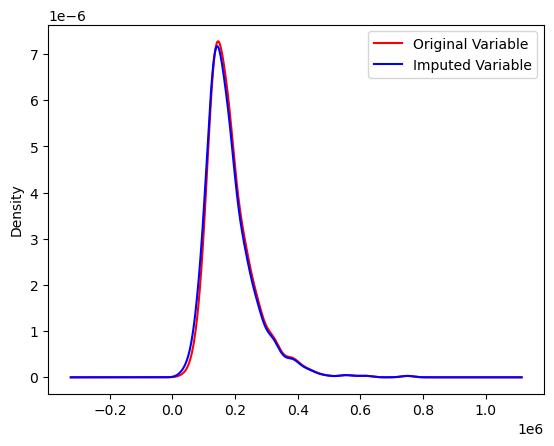

In [185]:
fig=plt.figure()
ax=fig.add_subplot()

temp.plot(kind="kde",color="red",ax=ax)

df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",color="blue",ax=ax)
line,label=ax.get_legend_handles_labels()
label=["Original Variable","Imputed Variable"]
ax.legend(line,label,loc="best")

- so basically if we see then the distribution is not changed highly so yes this is the correct for this column

In [186]:
# now we will apply on second column 

<Axes: xlabel='FireplaceQu'>

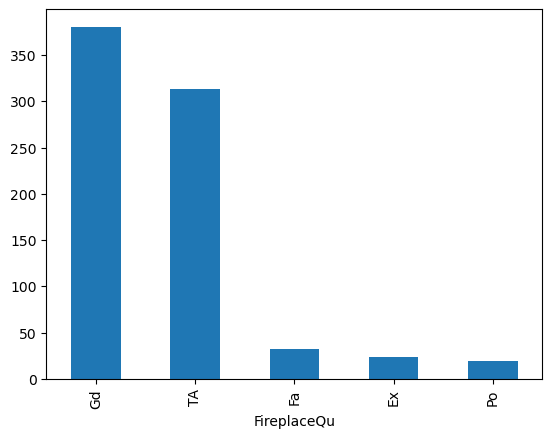

In [187]:
df["FireplaceQu"].value_counts().plot(kind="bar")

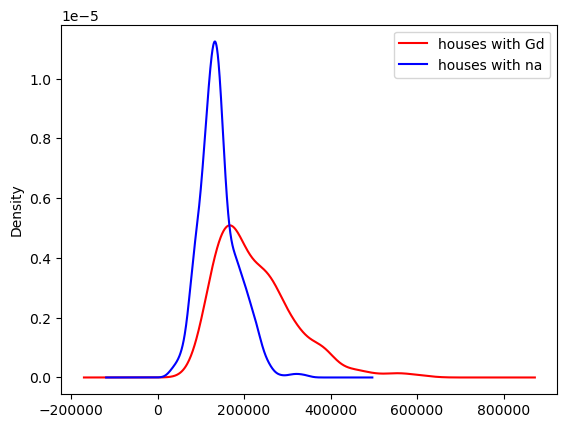

In [188]:
fig=plt.figure()
ax=fig.add_subplot()
# only FireplaceQu  
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot(kind="kde",ax=ax,color="red")
# na values
df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind="kde",ax=ax,color="blue")
line,label=ax.get_legend_handles_labels()
label=["houses with Gd","houses with na"]
ax.legend(line,label,loc="best")

In [189]:
temp=df[df["FireplaceQu"]=="Gd"]["SalePrice"]

In [190]:
df["FireplaceQu"].fillna("Gd",inplace=True)

C:\Users\kaleg\AppData\Local\Temp\ipykernel_6092\1169236726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("Gd",inplace=True)


<Axes: xlabel='FireplaceQu'>

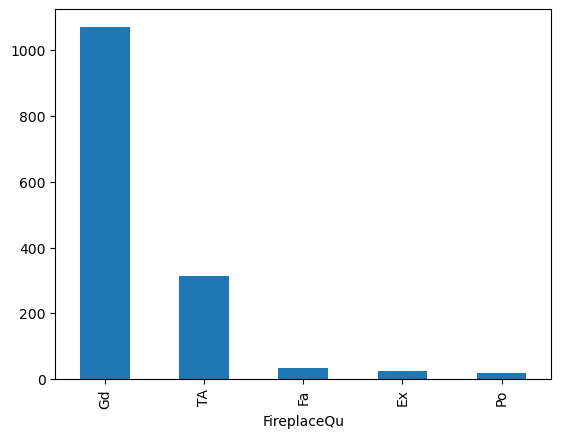

In [191]:
df["FireplaceQu"].value_counts().plot(kind="bar")

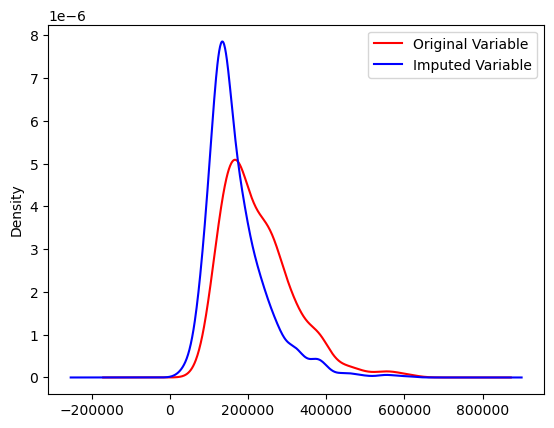

In [192]:
fig=plt.figure()
ax=fig.add_subplot()
# only FireplaceQu  
temp.plot(kind="kde",ax=ax,color="red")
# na values
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot(kind="kde",ax=ax,color="blue")
line,label=ax.get_legend_handles_labels()
label=["Original Variable","Imputed Variable"]
ax.legend(line,label,loc="best")

- so if we see here the distribution is changed that for this column most frequent is not applicable

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["SalePrice"]),df["SalePrice"],test_size=0.2,random_state=0)

In [195]:
x_train.shape

(1168, 2)

In [196]:
y_train.shape

(1168,)

In [197]:
from sklearn.impute import SimpleImputer

In [198]:
st=SimpleImputer(strategy="most_frequent")

In [199]:
st.fit(x_train)

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [200]:
x_train=st.transform(x_train)
x_test=st.transform(x_test)

# 2)Missing Category Imputation

In [201]:
df=pd.read_csv("train (1).csv",usecols=["FireplaceQu","GarageQual","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [ ]:
# fill using pandas

In [203]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

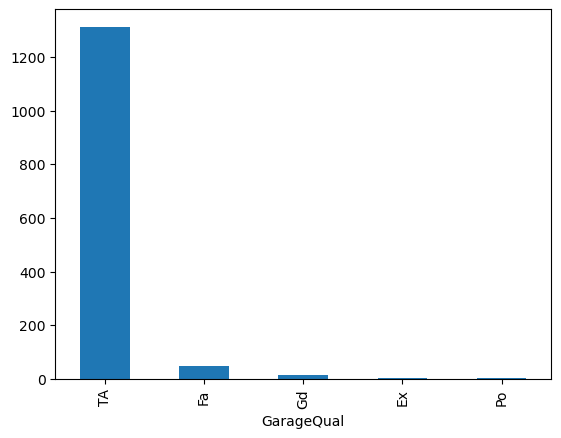

In [204]:
df["GarageQual"].value_counts().plot(kind="bar")

In [205]:
df["GarageQual"].fillna("Missing",inplace=True)

C:\Users\kaleg\AppData\Local\Temp\ipykernel_6092\2139821743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GarageQual"].fillna("Missing",inplace=True)


<Axes: xlabel='GarageQual'>

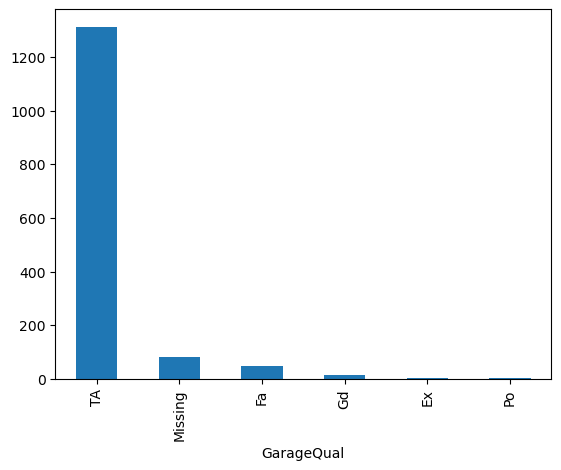

In [208]:
df["GarageQual"].value_counts().plot(kind="bar")     

- here we have just the na values with missing

In [209]:
# fill using ml

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["SalePrice"]),df["SalePrice"],test_size=0.2,random_state=0)

In [212]:
x_train.shape

(1168, 2)

In [213]:
y_train.shape

(1168,)

In [214]:
from sklearn.impute import SimpleImputer

In [215]:
st=SimpleImputer(strategy="constant",fill_value="Missing")

In [ ]:
st.fit(